<a href="https://colab.research.google.com/github/kelvinchiluwe/advanced_machine_learning_algorithms/blob/main/ccovolution_network1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# from tensorflow.keras.layers import SparseCategoricalCossentropy
# from tensorflow.keras.layers import SparseCategoricalCrossentropy

In [22]:
from tensorflow.keras.datasets import cifar10

In [23]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [24]:
X_train.shape

(50000, 32, 32, 3)

In [44]:
X_train=X_train / 255.0
X_test=X_test / 250.0

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
man=np.array([4,5,6])



In [26]:
print(X_train)

[[[[[0.23137255]
    [0.24313725]
    [0.24705882]]

   [[0.16862745]
    [0.18039216]
    [0.17647059]]

   [[0.19607843]
    [0.18823529]
    [0.16862745]]

   ...

   [[0.61960784]
    [0.51764706]
    [0.42352941]]

   [[0.59607843]
    [0.49019608]
    [0.4       ]]

   [[0.58039216]
    [0.48627451]
    [0.40392157]]]


  [[[0.0627451 ]
    [0.07843137]
    [0.07843137]]

   [[0.        ]
    [0.        ]
    [0.        ]]

   [[0.07058824]
    [0.03137255]
    [0.        ]]

   ...

   [[0.48235294]
    [0.34509804]
    [0.21568627]]

   [[0.46666667]
    [0.3254902 ]
    [0.19607843]]

   [[0.47843137]
    [0.34117647]
    [0.22352941]]]


  [[[0.09803922]
    [0.09411765]
    [0.08235294]]

   [[0.0627451 ]
    [0.02745098]
    [0.        ]]

   [[0.19215686]
    [0.10588235]
    [0.03137255]]

   ...

   [[0.4627451 ]
    [0.32941176]
    [0.19607843]]

   [[0.47058824]
    [0.32941176]
    [0.19607843]]

   [[0.42745098]
    [0.28627451]
    [0.16470588]]]


  ...


  [[[0.8

In [6]:
# X_train = X_train.reshape(-1, 32, 32, 3)


In [7]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=(40),kernel_size=(4,4),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Conv2D(filters=(80),kernel_size=(4,4),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')

])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 40)     │         1,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 9, 9, 40)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 80)       │        51,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 80)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,434 (290.76 KB)

 Trainable params: 74,434 (290.76 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history=model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test,y_test),
    verbose=1
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 38ms/step - accuracy: 0.3401 - loss: 1.7885 - val_accuracy: 0.5200 - val_loss: 1.3348
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.5534 - loss: 1.2566 - val_accuracy: 0.5853 - val_loss: 1.1852
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 35ms/step - accuracy: 0.6087 - loss: 1.1155 - val_accuracy: 0.6238 - val_loss: 1.0882
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.6472 - loss: 1.0066 - val_accuracy: 0.6442 - val_loss: 1.0295
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.6775 - loss: 0.9322 - val_accuracy: 0.6592 - val_loss: 0.9846
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.6888 - loss: 0.8959 - val_accuracy: 0.6604 - val_loss: 0.9947
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7069 - loss: 0.8490 - val_accuracy: 0.6641 - val_loss: 0.9800
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.7243 -

In [9]:
loss,accuracy=model.evaluate(X_test,y_test)
accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7014 - loss: 0.8833


0.6992999911308289

In [57]:
img =  tf.keras.utils.load_img("parrot.bird2.jpg", target_size=(32, 32))
img_array = tf.keras.utils.img_to_array(img)

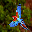

In [58]:
img

In [59]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [60]:
img_normalize= img_array/255.0

In [61]:
img_batch = np.expand_dims(img_normalize, axis=0)

In [62]:
prediction_probs = model.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [63]:
prediction_probs

array([[1.2229532e-02, 6.8483336e-05, 7.9120731e-01, 1.4971607e-04,
        1.1517911e-05, 7.5934855e-03, 4.4151548e-06, 3.2520695e-03,
        8.6145912e-05, 1.8539731e-01]], dtype=float32)

In [64]:
pred_index = np.argmax(prediction_probs)
pred_index

np.int64(2)

In [65]:
class_names[pred_index]

'bird'

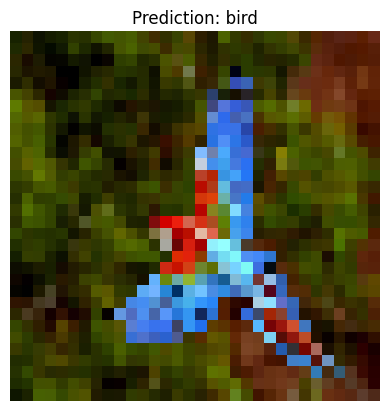

The model predicted this image is a: bird
Prediction probabilities: [[1.2229532e-02 6.8483336e-05 7.9120731e-01 1.4971607e-04 1.1517911e-05
  7.5934855e-03 4.4151548e-06 3.2520695e-03 8.6145912e-05 1.8539731e-01]]


In [66]:
# Show the results
plt.figure()
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {class_names[pred_index]}")
plt.axis('off')
plt.show()

print(f"The model predicted this image is a: {class_names[pred_index]}")
print(f"Prediction probabilities: {prediction_probs}")